In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install opencv-python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

dir = "/content/drive/MyDrive/colab_data/"
files = os.listdir(dir)

In [ ]:
def getAngle(cvImage) -> float:
    newImage = cvImage.copy()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thgrayresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # cv2_imshow(thresh)

    coords = np.column_stack(np.where(gray > 0))
    rect = cv2.minAreaRect(coords)


    r = list(rect)
    r[-1] = -r[-1]
    rect = tuple(r)


    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(newImage,[box],0,(0,0,255),2)



    angle = rect[-1]
    print(angle)
    if angle < -45: angle = (90 - angle)

    return angle

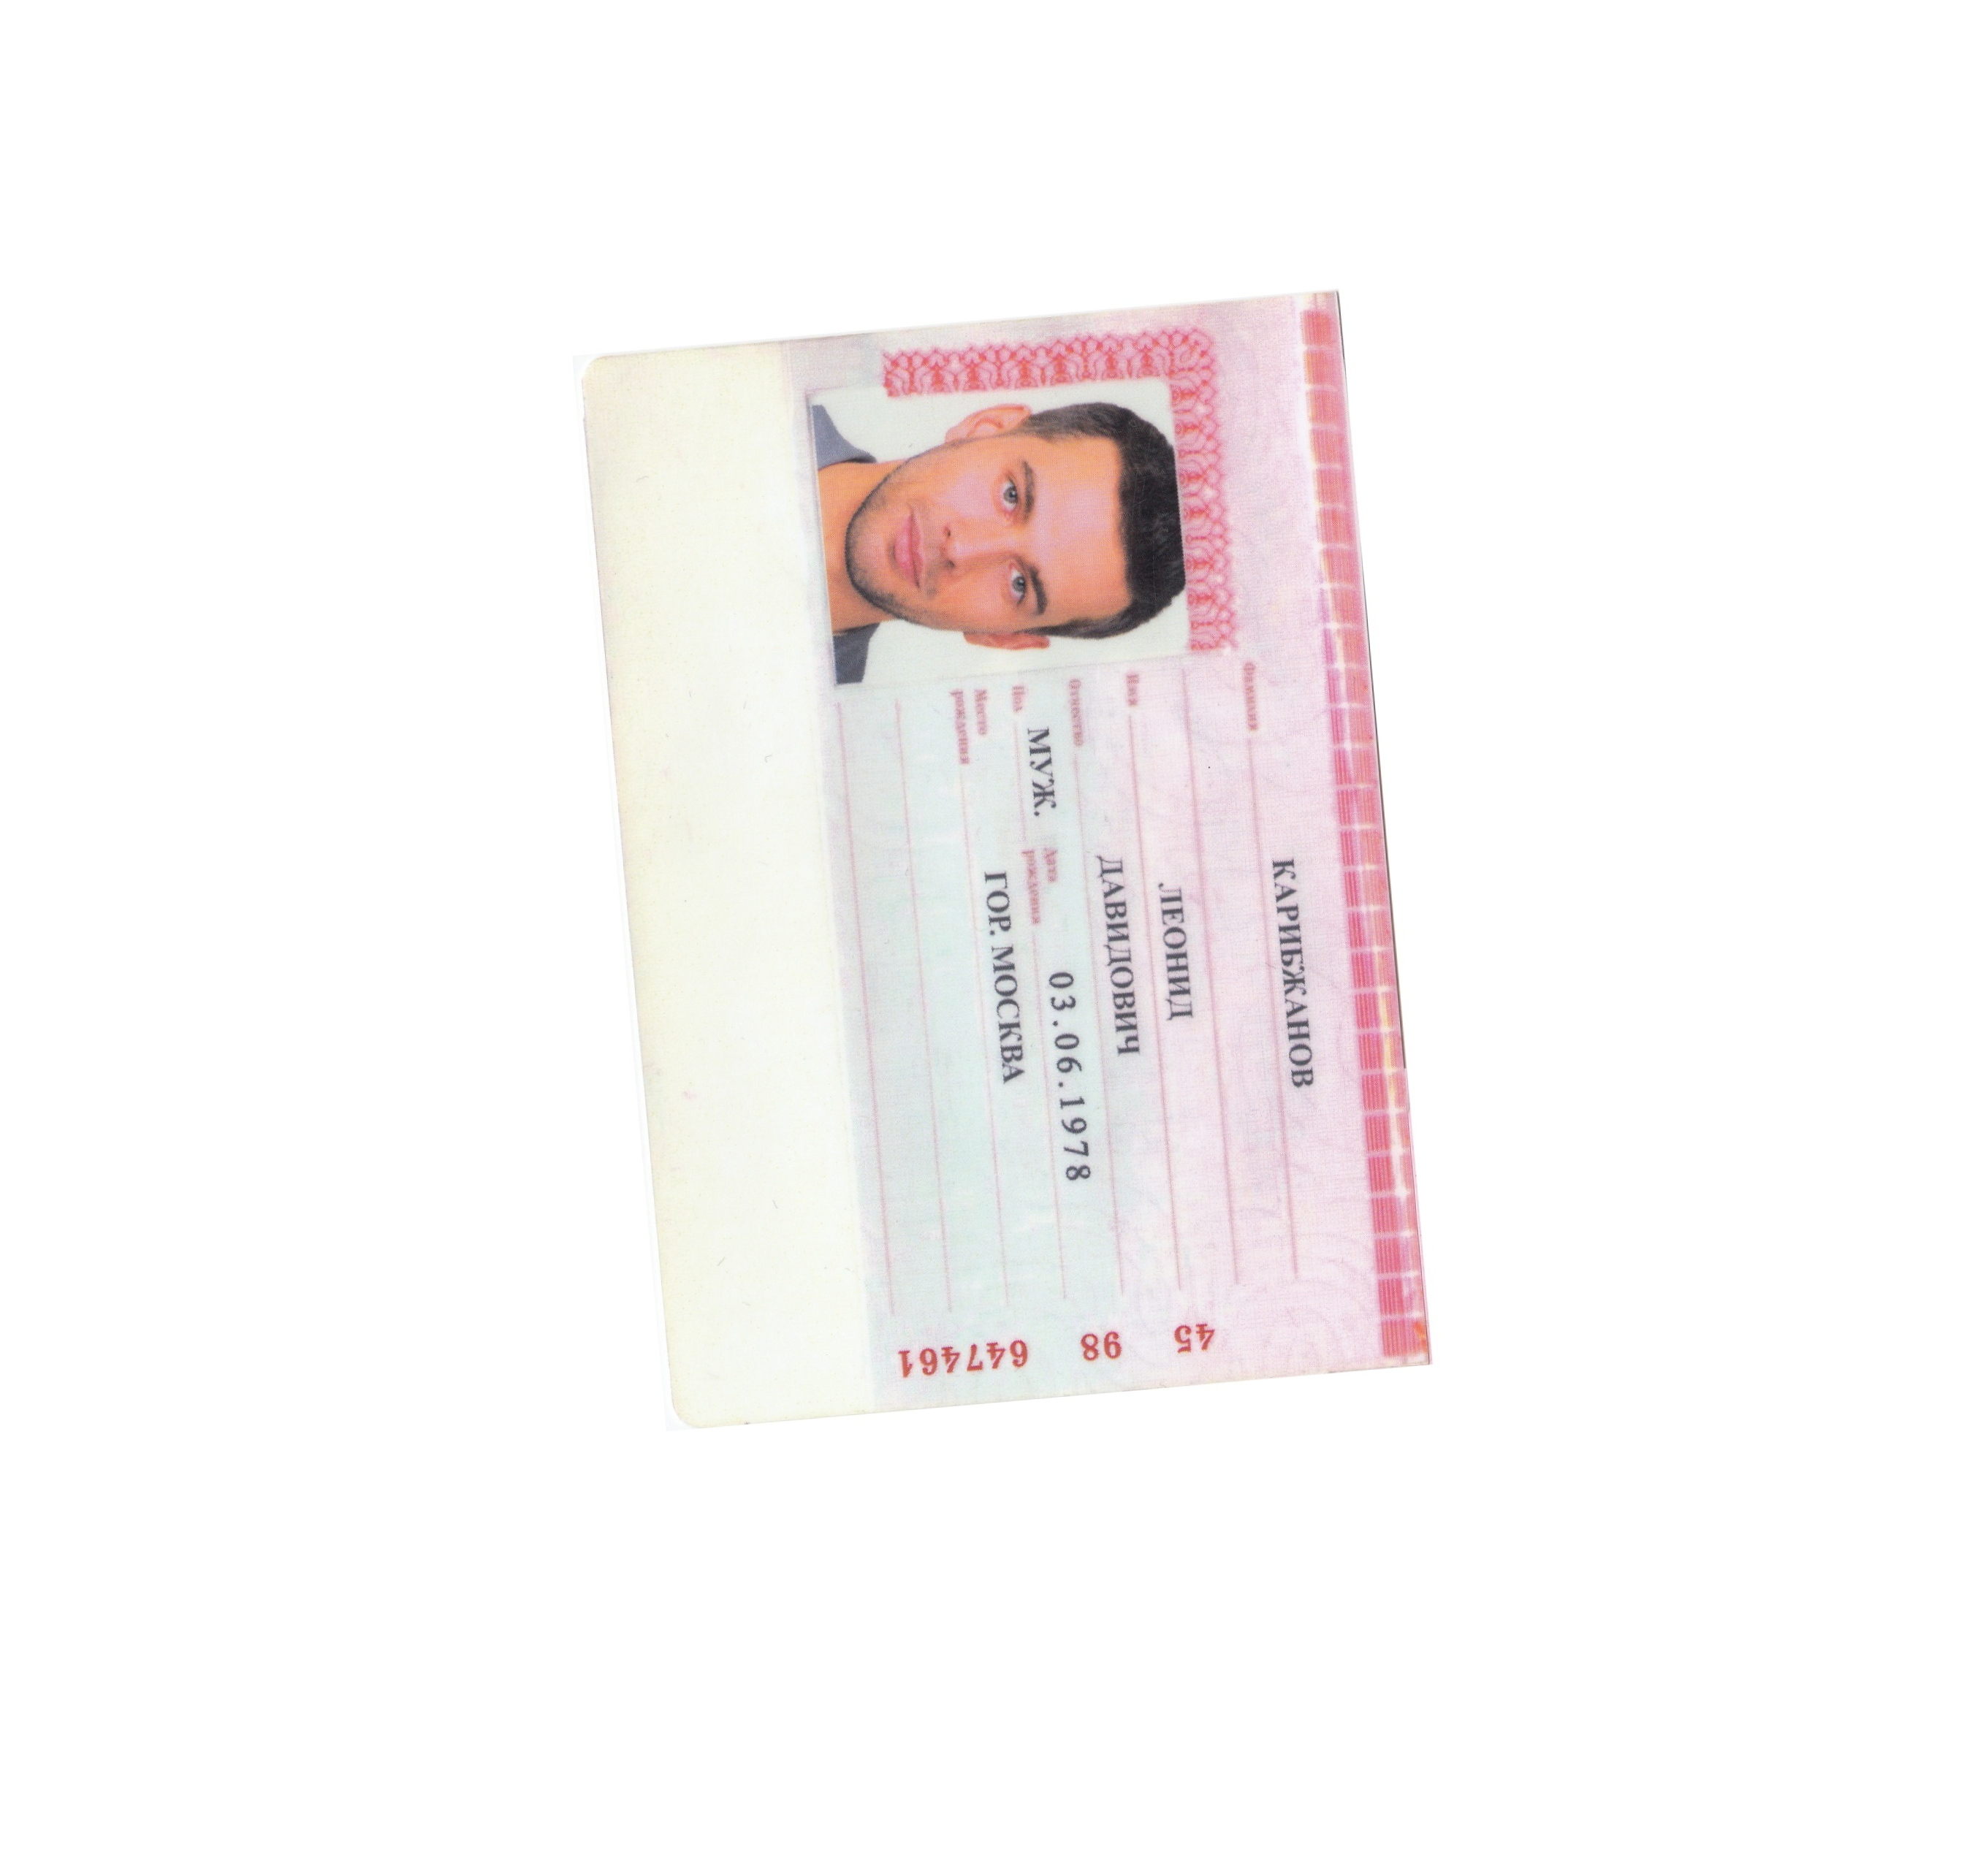

85.10090637207031
85.10090637207031


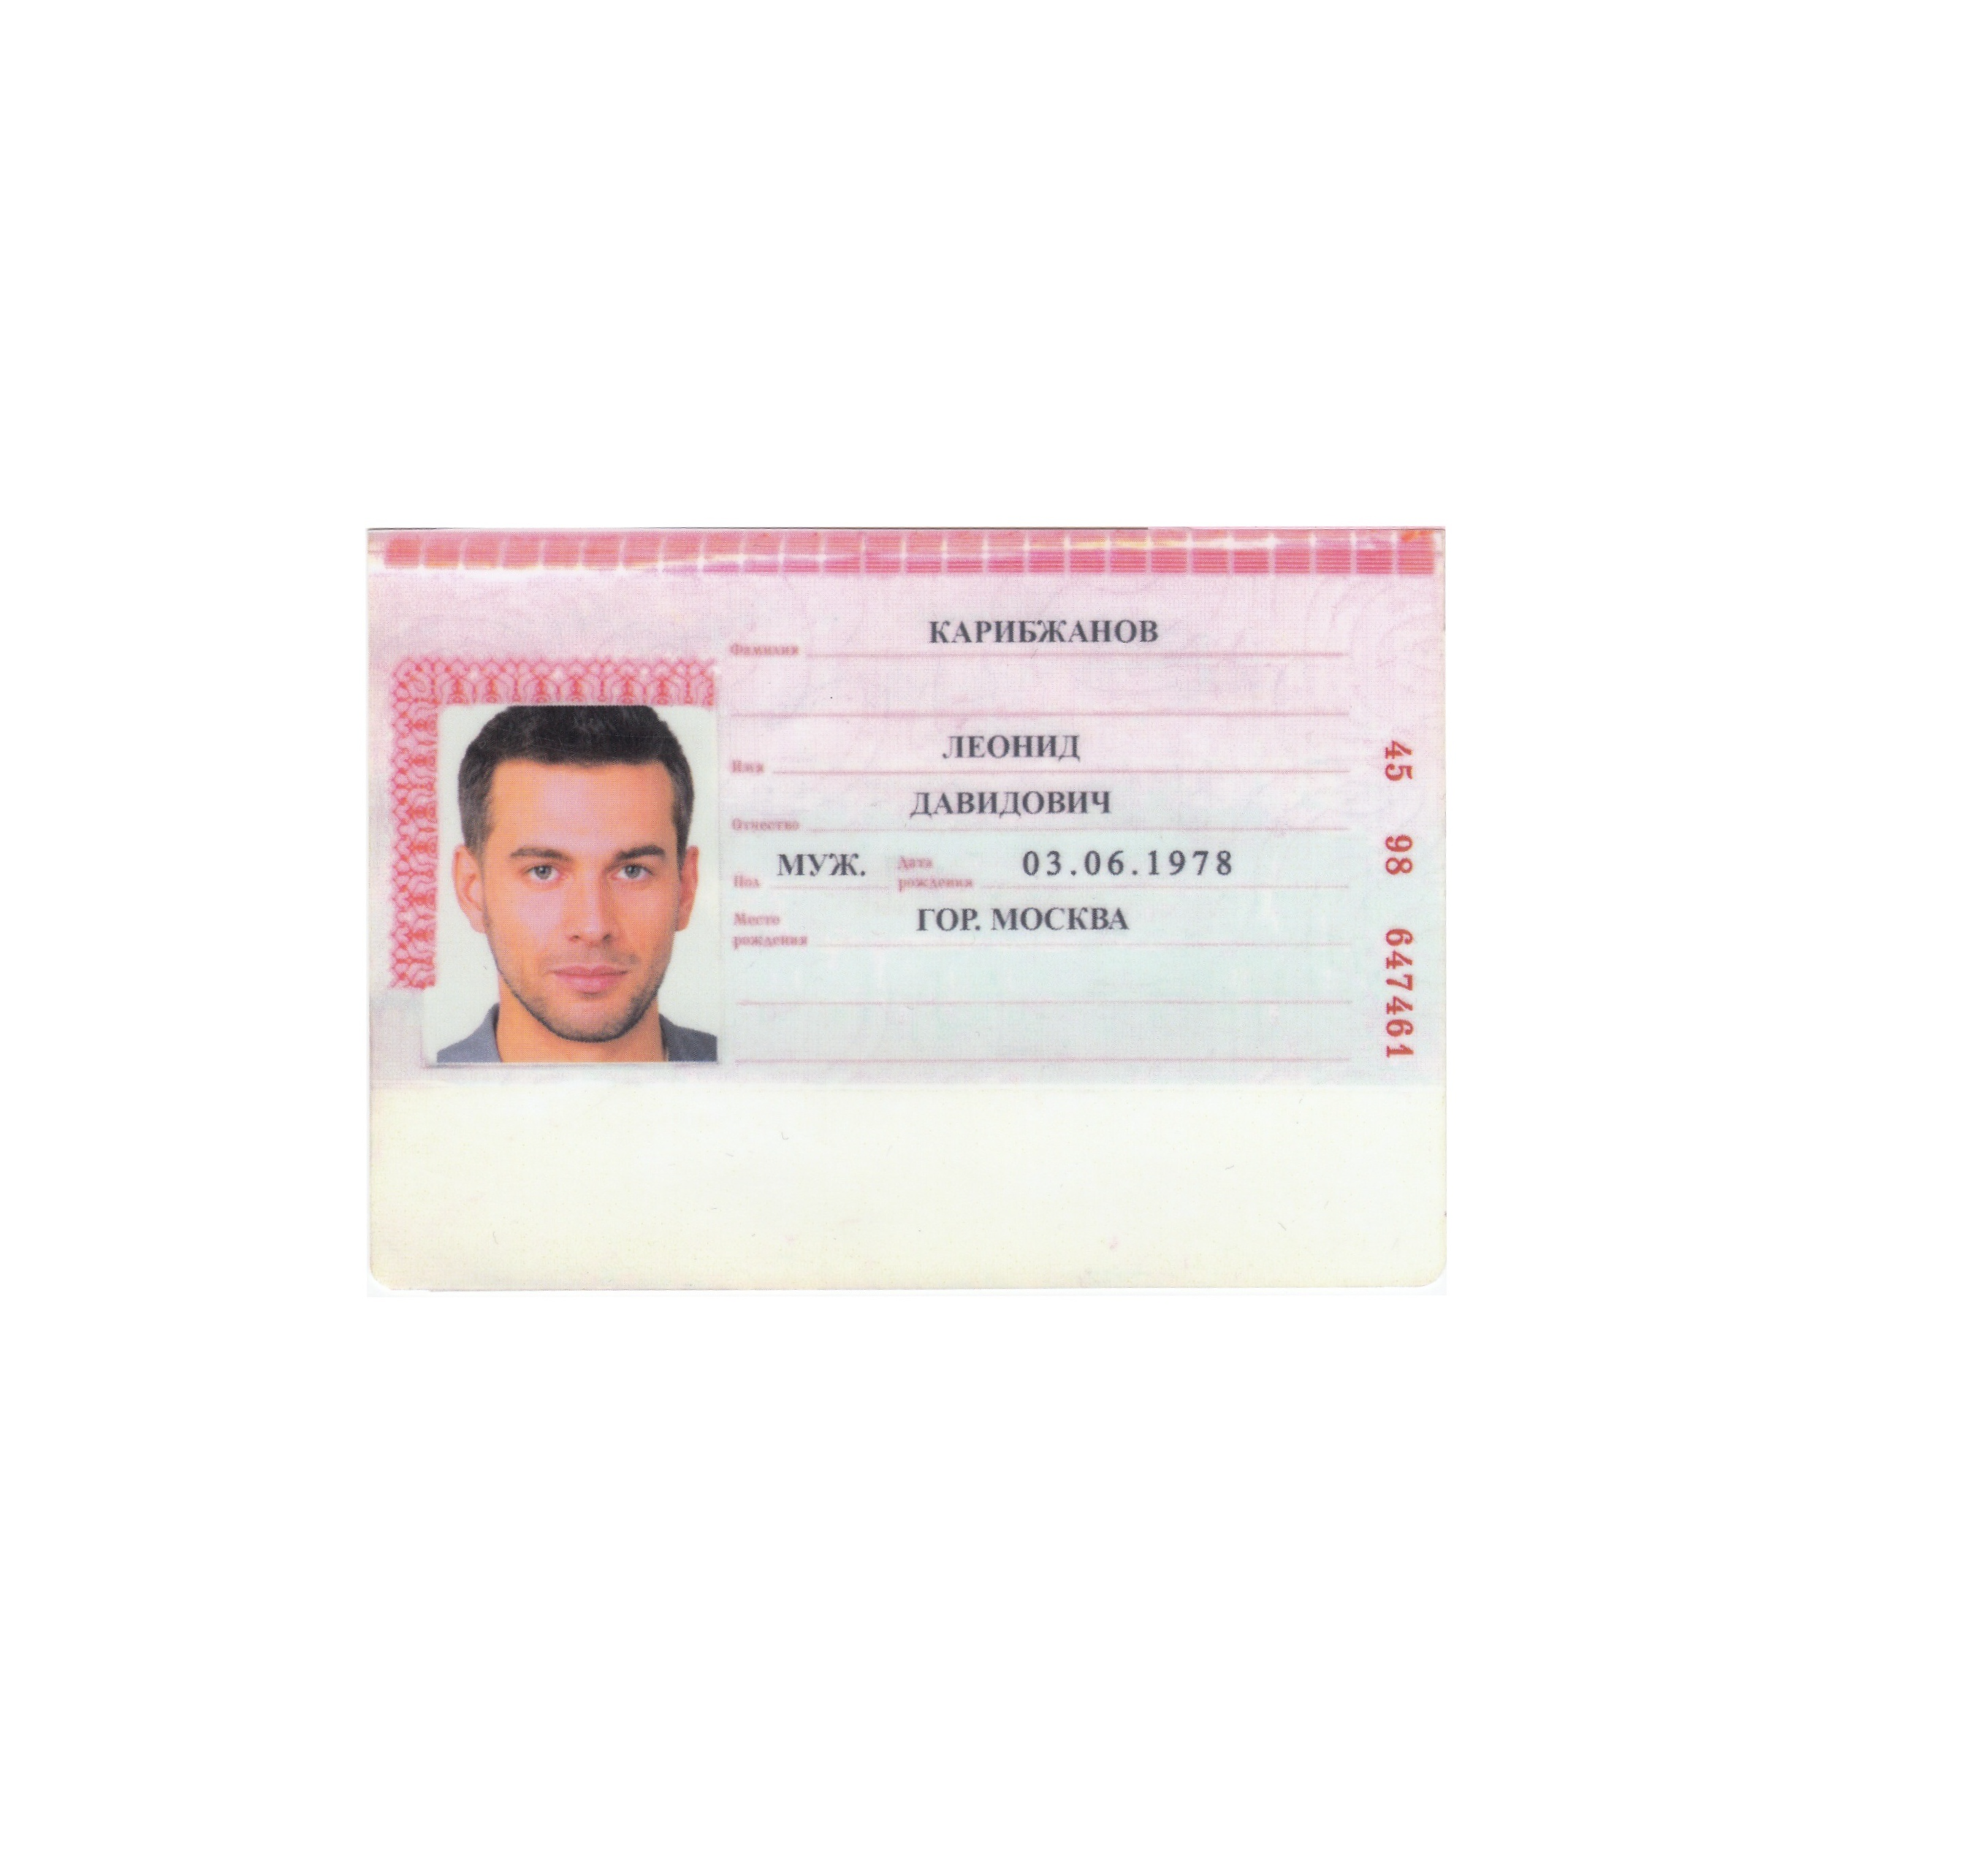

In [ ]:
image = cv2.imread("/content/drive/MyDrive/colab_data/image.jpg")
cv2_imshow(image)

angle = getAngle(image)
print(angle)

(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_WRAP)

cv2_imshow(rotated)